In [1]:
import os
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax , Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten
from tensorflow.keras.metrics import AUC

In [2]:
df = pd.read_csv('full_df.csv')

In [3]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [4]:
df.shape

(6392, 19)

In [5]:
df.duplicated().sum()


0

In [6]:
class_names = df['labels'].unique()
class_names

array(["['N']", "['D']", "['O']", "['M']", "['H']", "['C']", "['A']",
       "['G']"], dtype=object)

In [7]:
df = df[["filepath", "labels", "filename"]]

In [8]:
df.head()

,filepath,labels,filename
0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],0_right.jpg
1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1_right.jpg
2,../input/ocular-disease-recognition-odir5k/ODI...,['D'],2_right.jpg
3,../input/ocular-disease-recognition-odir5k/ODI...,['D'],4_right.jpg
4,../input/ocular-disease-recognition-odir5k/ODI...,['D'],5_right.jpg


In [9]:
df["labels"] = df["labels"].str.strip("[]'")

In [10]:
df.head()

,filepath,labels,filename
0,../input/ocular-disease-recognition-odir5k/ODI...,N,0_right.jpg
1,../input/ocular-disease-recognition-odir5k/ODI...,N,1_right.jpg
2,../input/ocular-disease-recognition-odir5k/ODI...,D,2_right.jpg
3,../input/ocular-disease-recognition-odir5k/ODI...,D,4_right.jpg
4,../input/ocular-disease-recognition-odir5k/ODI...,D,5_right.jpg


In [ ]:
data_dir = r"D:\AMIT\amit\csv model\preprocessed_images"

filepaths = []

filename = df["filename"].tolist()

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file in filename:  
            filepath = os.path.join(root, file)
            filepaths.append(filepath)

if len(filepaths) != len(filename):
    print("Warning: Mismatch in lengths of filepaths and filename lists.")

training = pd.DataFrame(data={'filepaths': filepaths, 'filename': filename, "labels": df["labels"][:len(filepaths)]})
training

,filepaths,filename,labels
0,D:\AMIT\amit\salma\csv model\preprocessed_imag...,0_right.jpg,N
1,D:\AMIT\amit\salma\csv model\preprocessed_imag...,1_right.jpg,N
2,D:\AMIT\amit\salma\csv model\preprocessed_imag...,2_right.jpg,D
3,D:\AMIT\amit\salma\csv model\preprocessed_imag...,4_right.jpg,D
4,D:\AMIT\amit\salma\csv model\preprocessed_imag...,5_right.jpg,D
...,...,...,...
6387,D:\AMIT\amit\salma\csv model\preprocessed_imag...,4686_left.jpg,D
6388,D:\AMIT\amit\salma\csv model\preprocessed_imag...,4688_left.jpg,D
6389,D:\AMIT\amit\salma\csv model\preprocessed_imag...,4689_left.jpg,D
6390,D:\AMIT\amit\salma\csv model\preprocessed_imag...,4690_left.jpg,D


In [12]:
df

,filepath,labels,filename
0,../input/ocular-disease-recognition-odir5k/ODI...,N,0_right.jpg
1,../input/ocular-disease-recognition-odir5k/ODI...,N,1_right.jpg
2,../input/ocular-disease-recognition-odir5k/ODI...,D,2_right.jpg
3,../input/ocular-disease-recognition-odir5k/ODI...,D,4_right.jpg
4,../input/ocular-disease-recognition-odir5k/ODI...,D,5_right.jpg
...,...,...,...
6387,../input/ocular-disease-recognition-odir5k/ODI...,D,4686_left.jpg
6388,../input/ocular-disease-recognition-odir5k/ODI...,D,4688_left.jpg
6389,../input/ocular-disease-recognition-odir5k/ODI...,D,4689_left.jpg
6390,../input/ocular-disease-recognition-odir5k/ODI...,D,4690_left.jpg


In [13]:
training.drop(columns=["filename"], inplace=True)

In [14]:
class_name=["N","D","G","C","A","H","M","O"]
target=df['labels'].map(lambda x: class_name.index(x))
target.value_counts()

labels
0    2873
1    1608
7     708
3     293
2     284
4     266
6     232
5     128
Name: count, dtype: int64

In [15]:
training.head()

,filepaths,labels
0,D:\AMIT\amit\salma\csv model\preprocessed_imag...,N
1,D:\AMIT\amit\salma\csv model\preprocessed_imag...,N
2,D:\AMIT\amit\salma\csv model\preprocessed_imag...,D
3,D:\AMIT\amit\salma\csv model\preprocessed_imag...,D
4,D:\AMIT\amit\salma\csv model\preprocessed_imag...,D


In [16]:
training["labels"]=training["labels"].map({"N":"Normal","D":"Diabetes","G":"Glaucoma","C":"Cataract"
                               ,"A":"Age related Macular Degeneration","H":"Hypertension"
                               ,"M":"Pathological Myopia","O":"Other diseases/abnormalities"})

In [17]:
training.head()

,filepaths,labels
0,D:\AMIT\amit\salma\csv model\preprocessed_imag...,Normal
1,D:\AMIT\amit\salma\csv model\preprocessed_imag...,Normal
2,D:\AMIT\amit\salma\csv model\preprocessed_imag...,Diabetes
3,D:\AMIT\amit\salma\csv model\preprocessed_imag...,Diabetes
4,D:\AMIT\amit\salma\csv model\preprocessed_imag...,Diabetes


In [18]:
training["labels"].value_counts()

labels
Normal                              2873
Diabetes                            1608
Other diseases/abnormalities         708
Cataract                             293
Glaucoma                             284
Age related Macular Degeneration     266
Pathological Myopia                  232
Hypertension                         128
Name: count, dtype: int64

In [19]:
train_df, dummy_df = train_test_split(training,  train_size= 0.8, shuffle= True, random_state= 123)
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)

### **Create image data generator**

In [20]:
tr_gen = ImageDataGenerator(
    rescale= 1./255,
    zoom_range=0.15,  
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9,1.1],
    fill_mode='constant'
)
ts_gen = ImageDataGenerator(rescale= 1./255)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= (224, 224), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= 64)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= (224, 224), class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= 64)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= (224, 224), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= 64)

Found 5113 validated image filenames belonging to 8 classes.
Found 639 validated image filenames belonging to 8 classes.
Found 640 validated image filenames belonging to 8 classes.


In [21]:
class_names = list(train_gen.class_indices.keys())
print("Class order:", class_names)

Class order: ['Age related Macular Degeneration', 'Cataract', 'Diabetes', 'Glaucoma', 'Hypertension', 'Normal', 'Other diseases/abnormalities', 'Pathological Myopia']


In [22]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(train_gen.classes), y=train_gen.classes)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 2.958912037037037, 1: 2.7667748917748916, 2: 0.4981488698363211, 3: 2.8155286343612334, 4: 6.39125, 5: 0.27560370849504096, 6: 1.1515765765765766, 7: 3.5116758241758244}


### **Show sample from train data**

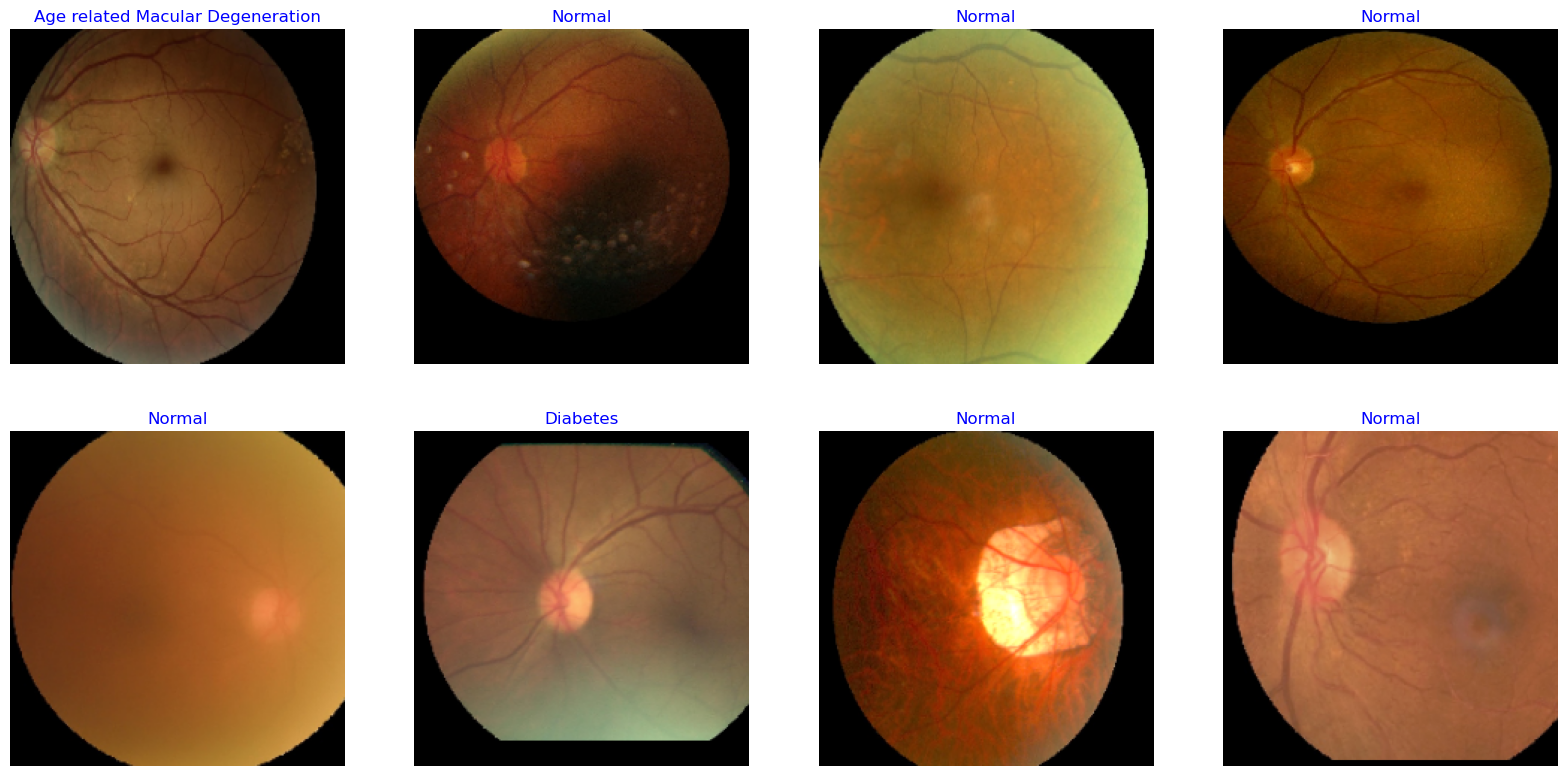

In [23]:
g_dict = train_gen.class_indices     
classes = list(g_dict.keys())      

images, labels = next(train_gen)

plt.figure(figsize=(20, 20))
for i in range(8):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])  
    plt.title(classes[np.argmax(labels[i])], fontsize=12, color='blue')
    plt.axis('off')
plt.show()


# **Model Structure**

#### **Generic Model Creation**

In [ ]:
# model_base= tf.keras.applications.EfficientNetV2B3(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='max')
# model_base.trainable = False

In [ ]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= (224, 224, 3)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(8, activation = "softmax")])
model.compile(Adamax(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy', AUC()])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

#### **Train model**

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
early_stop = EarlyStopping(
            monitor='val_loss',
            patience=10,
            verbose=1,
            mode='min',
            restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=1e-30,
            verbose=1,
            mode='min')
Checkpoint= ModelCheckpoint(
            'model.keras',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1,
            mode='max')
callbacks = [early_stop, reduce_lr, Checkpoint]

In [ ]:
history = model.fit(x= train_gen,epochs=100,verbose=1,validation_data=valid_gen,validation_steps= None, shuffle= False,callbacks=callbacks)

Epoch 1/100
80/80 [==============================] - ETA: 0s - loss: 1.6493 - accuracy: 0.4473 - auc: 0.7936
Epoch 1: val_accuracy improved from -inf to 0.43906, saving model to model.keras
80/80 [==============================] - 128s 1s/step - loss: 1.6493 - accuracy: 0.4473 - auc: 0.7936 - val_loss: 1.5588 - val_accuracy: 0.4391 - val_auc: 0.8127 - lr: 1.0000e-04
Epoch 2/100
80/80 [==============================] - ETA: 0s - loss: 1.5730 - accuracy: 0.4535 - auc: 0.8046
Epoch 2: val_accuracy did not improve from 0.43906
80/80 [==============================] - 64s 793ms/step - loss: 1.5730 - accuracy: 0.4535 - auc: 0.8046 - val_loss: 1.5586 - val_accuracy: 0.4391 - val_auc: 0.8109 - lr: 1.0000e-04
Epoch 3/100
80/80 [==============================] - ETA: 0s - loss: 1.5671 - accuracy: 0.4535 - auc: 0.8054
Epoch 3: val_accuracy did not improve from 0.43906
80/80 [==============================] - 64s 788ms/step - loss: 1.5671 - accuracy: 0.4535 - auc: 0.8054 - val_loss: 1.5529 - val_a

#### **Display model performance**

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc', 'lr'])


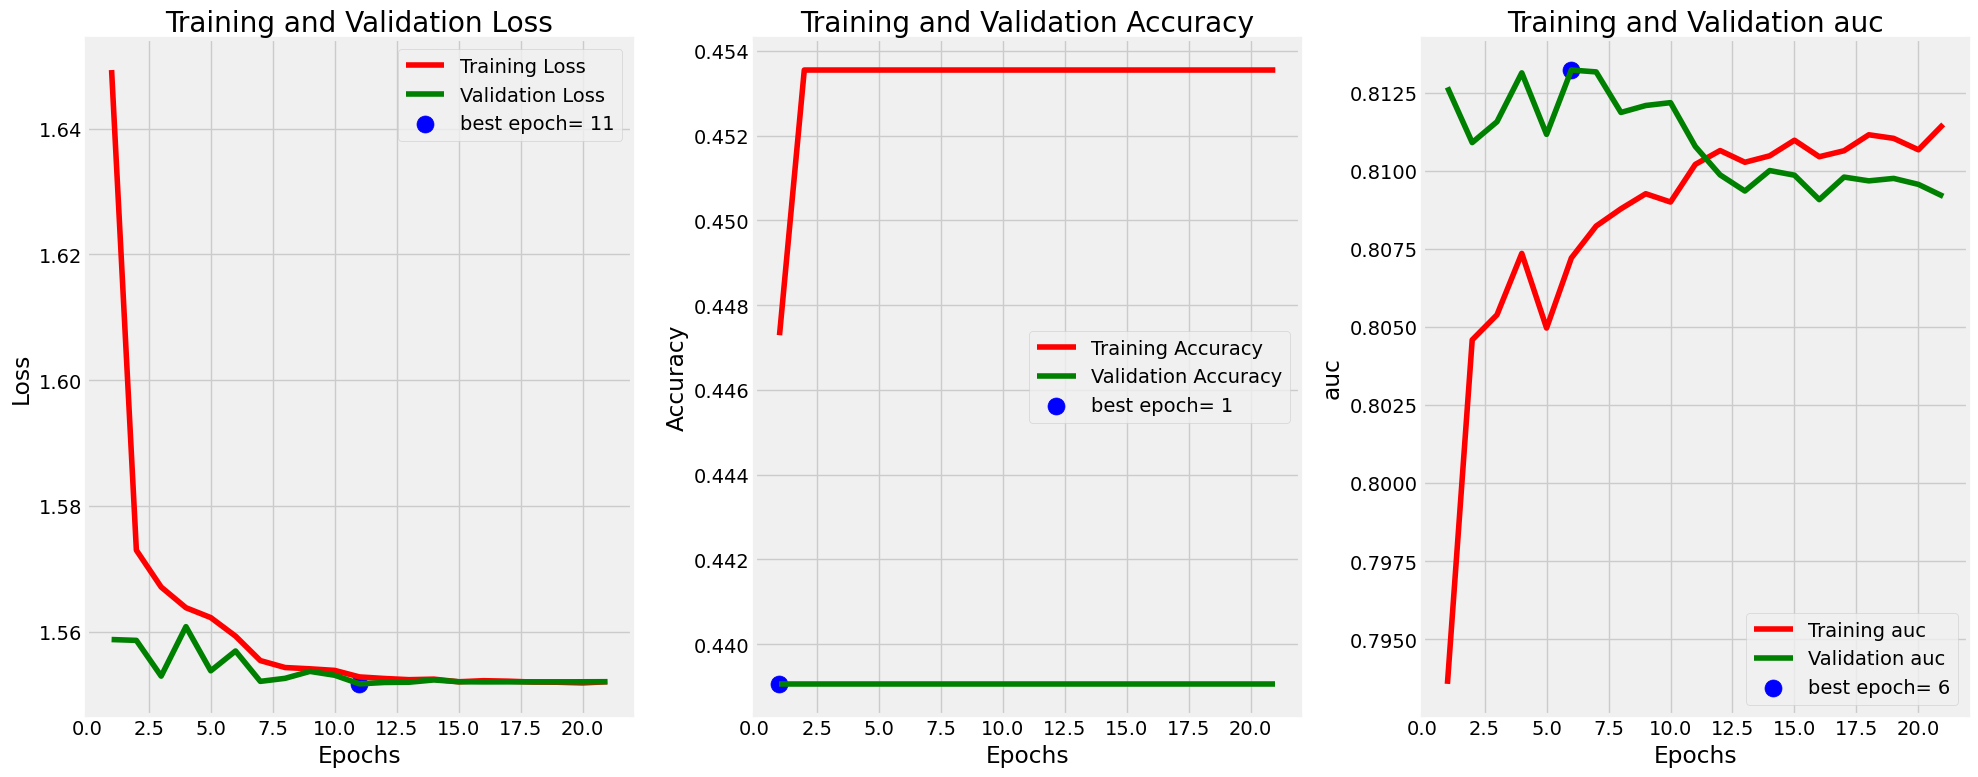

In [29]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
tr_auc = history.history['auc']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_auc = history.history['val_auc'] 

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
index_auc = np.argmax(val_auc) 

acc_highest = val_acc[index_acc]
auc_highest = val_auc[index_auc] 


Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {index_loss + 1}'
acc_label = f'best epoch= {index_acc + 1}'
auc_label = f'best epoch= {index_auc + 1}'


plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1, 3, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training Loss')
plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(Epochs, tr_auc, 'r', label='Training auc')
plt.plot(Epochs, val_auc, 'g', label='Validation auc')
plt.scatter(index_auc + 1, auc_highest, s=150, c='blue', label=auc_label)
plt.title('Training and Validation auc')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()

plt.tight_layout()  
plt.show()

# **Evaluate model**

In [30]:
train_score = model.evaluate(train_gen )
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print("Train AUC: ", train_score[2])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print("Valid AUC: ", valid_score[2])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print("Test AUC: ", test_score[2])

10/10 [==============================] - 2s 179ms/step - loss: 1.5517 - accuracy: 0.4391 - auc: 0.8108
Train Loss:  1.5524576902389526
Train Accuracy:  0.4535497725009918
Train AUC:  0.8109915256500244
--------------------
Valid Loss:  1.629825472831726
Valid Accuracy:  0.4272300601005554
Valid AUC:  0.784149706363678
--------------------
Test Loss:  1.5517137050628662
Test Accuracy:  0.4390625059604645
Test AUC:  0.8107736706733704


# **Get Predictions**

In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

#### **Confusion Matrics and Classification Report**

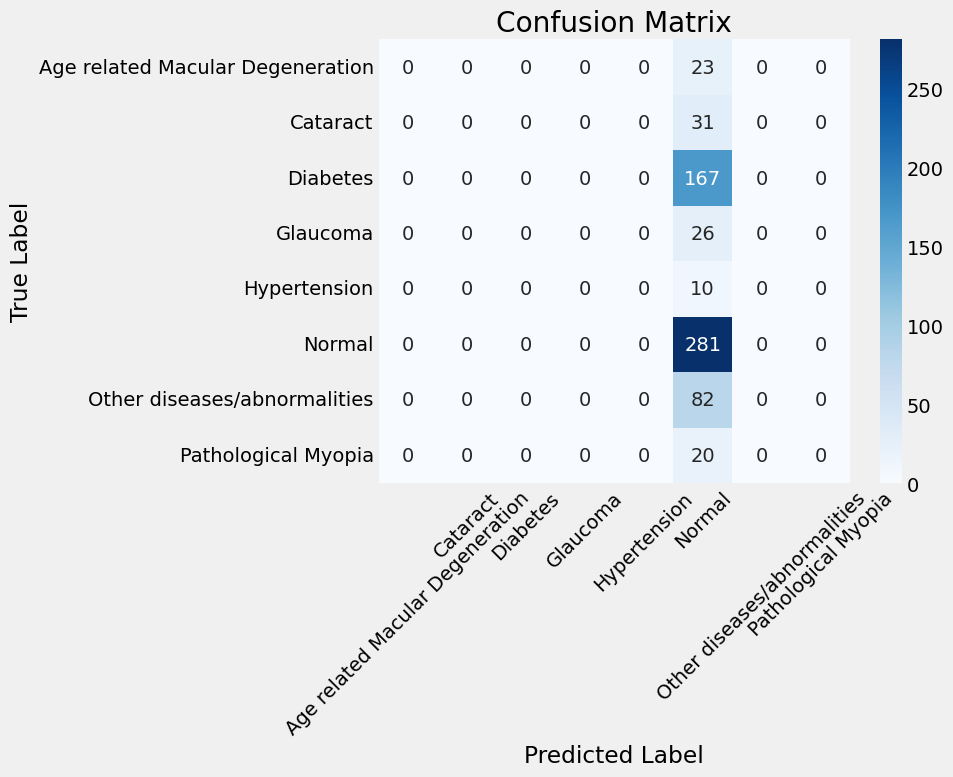

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_gen.classes
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d',  
    cmap="Blues",
    xticklabels=test_gen.class_indices.keys(),
    yticklabels=test_gen.class_indices.keys())

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# **classification_report**

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                                  precision    recall  f1-score   support

Age related Macular Degeneration       0.00      0.00      0.00        23
                        Cataract       0.00      0.00      0.00        31
                        Diabetes       0.00      0.00      0.00       167
                        Glaucoma       0.00      0.00      0.00        26
                    Hypertension       0.00      0.00      0.00        10
                          Normal       0.44      1.00      0.61       281
    Other diseases/abnormalities       0.00      0.00      0.00        82
             Pathological Myopia       0.00      0.00      0.00        20

                        accuracy                           0.44       640
                       macro avg       0.05      0.12      0.08       640
                    weighted avg       0.19      0.44      0.27       640



c:\Users\Legion\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Legion\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Legion\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


: 